<a href="https://colab.research.google.com/github/Iztund/portfolio/blob/main/my_project_code1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import sympy as sp
import scipy
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

In [ ]:
#setting the initial conditions
x0,y0,z0 = 0,0.0,0.6
r0 = [x0,y0,z0]
t0 = 0.0
tf = 100
step = 0.01
t = np.arange(t0,tf,step)
alpha,beta,a,b = 9,100/7,8/7,5/7

def f(x,a,b):
    return b*x + (a-b)*(np.abs(x+1) - np.abs(x-1))/2
def chua_circuit(t,r,alpha,beta,a,b):
    x,y,z = r
    dx_dt = alpha*(y - x + f(x,a,b))
    dy_dt = x - y + z
    dz_dt = -beta * y
    return [dx_dt,dy_dt,dz_dt]
def f(x,a,b):
    return b*x + (a-b)*(np.abs(x+1) - np.abs(x-1))/2
def chua_circuit(t,r,alpha,beta,a,b):
    x,y,z = r
    dx_dt = alpha*(y - x + f(x,a,b))
    dy_dt = x - y + z
    dz_dt = -beta * y
    return np.array([dx_dt,dy_dt,dz_dt])

In [ ]:
np.set_printoptions(precision=4)

def jacobian(x):
    # where d(f(x))/dx = b + 0.5*(a - b)*(1 - sign(x - 1)) - 0.5*(a - b)*(1 - sign(x + 1))
    dfdx = b + 0.5*(a - b)*(1 - np.sign(x - 1)) - 0.5*(a - b)*(1 - np.sign(x + 1))
    J = np.array([[-alpha + alpha*dfdx, alpha, 0],
                  [1, -1, 1],
                  [0, -beta, 0]])
    return J

def equilibrium():
    first_eq  = np.array([-(a-b)/(b-1), 0,(a-b)/(b-1)])
    second_eq = np.zeros(3)
    third_eq = np.array([(a-b)/(b-1), 0,-(a-b)/(b-1)])
    return first_eq,second_eq,third_eq


def stability_analysis():
    first,second,third = equilibrium()
    m = [first,second,third]
    eigen_val=[]
    lyap = []
    eig_vec = []
    for i in m:
        j_eq = jacobian(i[0])
        eigva, eigve  = np.linalg.eig(j_eq)
        eigen_val.append(eigva)
        lyap_exponents = np.real(np.sum(np.log(np.abs(eigva))))
        lyap.append(lyap_exponents)
        eig_vec.append(eigve)
    return m,eigen_val,lyap,eig_vec

m,eigen_val, lyap_exponents, eig_vec= stability_analysis()
j=0
for i,eq in enumerate(m):
    print(f"Equilibrium Point {i+1}: {eq}")
    print(f"Eigenvalues: {eigen_val[i]}")
    print(f"Lyapunov Exponent: {lyap_exponents[i]}")
    print()

Equilibrium Point 1: [ 1.5  0.  -1.5]
Eigenvalues: [-3.9421+0.j     0.1854+3.047j  0.1854-3.047j]
Lyapunov Exponent: 3.603721645773632

Equilibrium Point 2: [0. 0. 0.]
Eigenvalues: [ 2.2174+0.j     -0.9658+2.7112j -0.9658-2.7112j]
Lyapunov Exponent: 2.9105744652136827

Equilibrium Point 3: [-1.5  0.   1.5]
Eigenvalues: [-3.9421+0.j     0.1854+3.047j  0.1854-3.047j]
Lyapunov Exponent: 3.603721645773632



In [ ]:
r = np.zeros((len(t), len(r0)))
r[0] = r0

def RUNKUT4_step(f, t, r, step, *args):
    k1 = step * np.array(f(t,r, *args))
    k2 = step * np.array(f(t + 0.5*step, r + 0.5*k1, *args))
    k3 = step * np.array(f(t + 0.5*step, r + 0.5*k2, *args))
    k4 = step * np.array(f(t + step, r + k3, *args))
    return r + (k1 +2.0*k2 + 2.0*k3 + k4) / 6.0


for i in range(len(t)-1):
    r[i+1] = RUNKUT4_step(chua_circuit, t[i], r[i], step, alpha, beta, a, b)

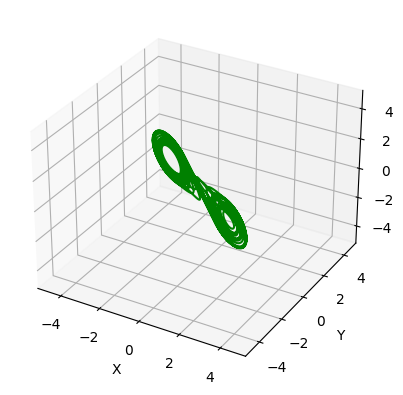

In [ ]:
# this line plot a static three-dimentional graph of x,y,z axis
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.ticker import MaxNLocator
fig = plt.figure()
ax = plt.axes(projection='3d')


x = r[:i, 0]
y = r[:i, 1]
z = r[:i, 2]
ax.plot3D(x,y,z, color='green')


#surf = ax.plot_trisurf(x,y,z,cmap=cm.jet,linewidth=0,color='blue')
#fig.colorbar(surf)

#ax.grid(False)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.savefig('My three dimensional face plot.jpg')
plt.show()

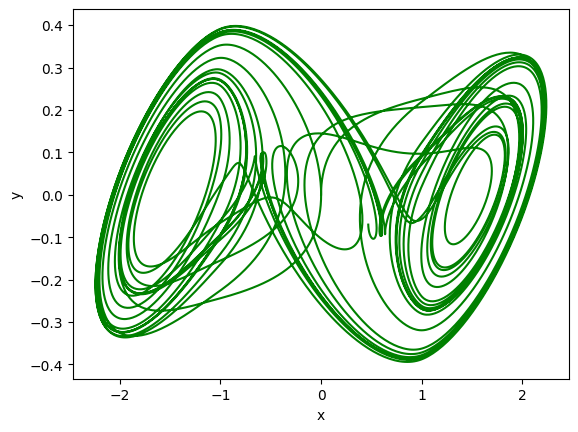

In [ ]:
# this graph plot static graph of x and y axis
x = r[:i, 0]
y = r[:i, 1]
fig, ax = plt.subplots()
plt.plot(x,y,color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

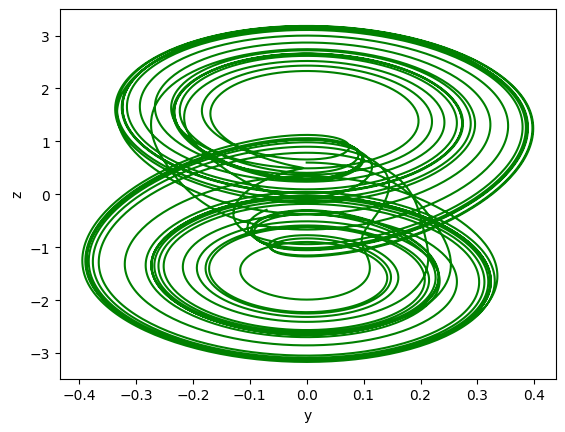

In [ ]:
# this graph plot static graph of x and y axis
x = r[:i, 1]
y = r[:i, 2]
fig, ax = plt.subplots()
plt.plot(x,y,color='green')
plt.xlabel('y')
plt.ylabel('z')
plt.show()

time series code for t-x plot

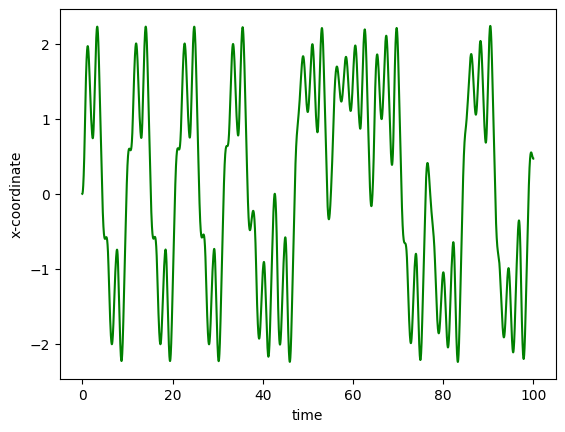

In [ ]:
# time series graph
x = r[:, 0]
time = t
fig, ax = plt.subplots()
plt.plot(time,x,color='green')
plt.xlabel('time')
plt.ylabel('x-coordinate')
plt.show()

time series code for t-y plot

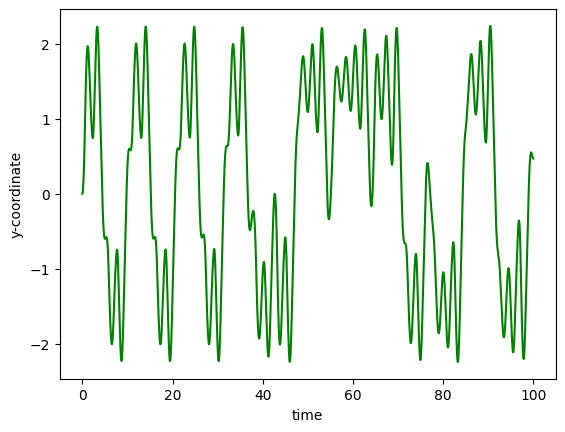

In [ ]:
# time series graph
y = r[:, 1]
time = t
fig, ax = plt.subplots()
plt.plot(time,x,color='green')
plt.xlabel('time')
plt.ylabel('y-coordinate')
plt.show()

time series code for t-z plot

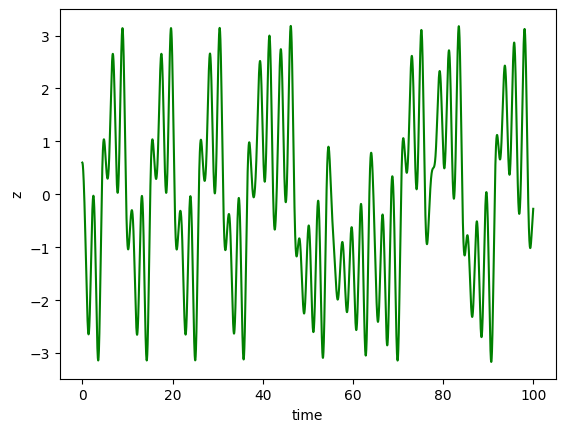

In [ ]:
# time series graph
x = r[:, 2]
time = t
fig, ax = plt.subplots()
plt.plot(time,x,color='green')
plt.xlabel('time')
plt.ylabel('z')
plt.show()

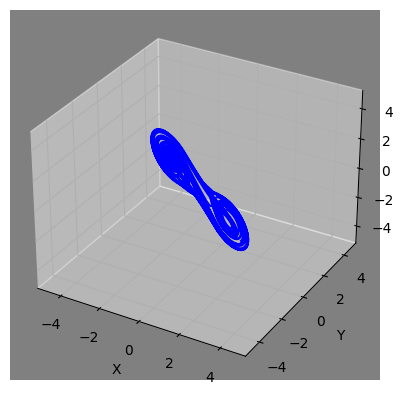

In [ ]:
#setting the initial conditions
x0,y0,z0 = 0,0,0.6
r0 = [x0,y0,z0]
t0 = 0.0
tf = 100
step = 0.01
t = np.arange(t0,tf,step)
alpha,beta,a,b = 10,100/7,8/7,5/7

def f(x,a,b):
    return b*x + (a-b)*(np.abs(x+1) - np.abs(x-1))/2
def chua_circuit(t,r,alpha,beta,a,b):
    x,y,z = r
    dx_dt = alpha*(y - x + f(x,a,b))
    dy_dt = x - y + z
    dz_dt = -beta * y
    return [dx_dt,dy_dt,dz_dt]
def f(x,a,b):
    return b*x + (a-b)*(np.abs(x+1) - np.abs(x-1))/2
def chua_circuit(t,r,alpha,beta,a,b):
    x,y,z = r
    dx_dt = alpha*(y - x + f(x,a,b))
    dy_dt = x - y + z
    dz_dt = -beta * y
    return [dx_dt,dy_dt,dz_dt]


r = np.zeros((len(t), len(r0)))
r[0] = r0

def RUNKUT4_step(f, t, r, step, *args):
    k1 = step * np.array(f(t,r, *args))
    k2 = step * np.array(f(t + 0.5*step, r + 0.5*k1, *args))
    k3 = step * np.array(f(t + 0.5*step, r + 0.5*k2, *args))
    k4 = step * np.array(f(t + step, r + k3, *args))
    return r + (k1 +2.0*k2 + 2.0*k3 + k4) / 6.0


for i in range(len(t)-1):
    r[i+1] = RUNKUT4_step(chua_circuit, t[i], r[i], step, alpha, beta, a, b)


# this line plot a static three-dimentional graph of x,y,z axis
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.ticker import MaxNLocator
fig = plt.figure()
ax = plt.axes(projection='3d')


x = r[:i, 0]
y = r[:i, 1]
z = r[:i, 2]
ax.plot3D(x,y,z, color='blue')
ax.set_facecolor("gray")

#surf = ax.plot_trisurf(x,y,z,cmap=cm.jet,linewidth=0,color='blue')
#fig.colorbar(surf)

#ax.grid(False)
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.savefig('My three dimensional face plot.jpg')
plt.show()

lyapunov exponents computation of chua circuit

0.31668854921968


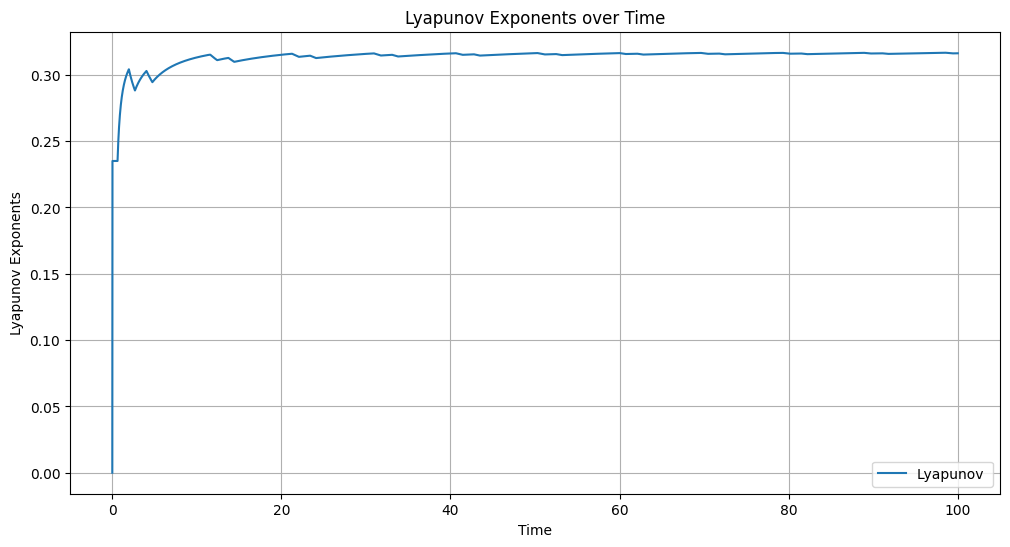

In [ ]:
def calculate_lyapunov_exponents(x, y, z, t, alpha, beta, a, b, num_steps, step):
    # Initialize variables
    num_exponents = 3
    lyapunov_exponents = np.zeros((num_steps, num_exponents))
    lyapunov_sum = np.zeros(num_exponents)

    for i in range(1, num_steps):
        r = [x[i - 1], y[i - 1], z[i - 1]]
        J = jacobian(x[i - 1])
        eigenvalues, _ = np.linalg.eig(J)

        for j in range(num_exponents):
            lyapunov_sum[j] += np.log(np.abs(eigenvalues[j])) /  step
            lyapunov_exponents[i, j] = lyapunov_sum[j]

        dx_dt, dy_dt, dz_dt = chua_circuit(t[i - 1], r,alpha, beta, a, b)
        x[i] = x[i - 1] + dx_dt * step
        y[i] = y[i - 1] + dy_dt * step
        z[i] = z[i - 1] + dz_dt * step

        # Normalize Lyapunov exponents to avoid numerical instabilities
        lyapunov_exponents[i] = lyapunov_exponents[i] / np.linalg.norm(lyapunov_exponents[i])/2

    return lyapunov_exponents

# Set up initial conditions and parameters
x0 = 0
y0 = 0
z0 = 0.6
alpha = 9
beta = 100/7
a = 8/7
b = 5/7

# Set up time parameters
t_init = 0
t_final = 100
num_steps = 10000
step_height = (t_final - t_init) / num_steps
t = np.linspace(t_init, t_final, num_steps)

# Initialize arrays to store system states
x = np.zeros(num_steps)
y = np.zeros(num_steps)
z = np.zeros(num_steps)

# Set initial conditions
x[0] = x0
y[0] = y0
z[0] = z0

# Calculate Lyapunov exponents
lyapunov_exponents = calculate_lyapunov_exponents(x, y, z, t, alpha, beta, a, b, num_steps, step_height)
print(np.max(lyapunov_exponents))
# Plot Lyapunov exponents over time
plt.figure(figsize=(12, 6))
plt.plot(t, lyapunov_exponents[:, 0], label='Lyapunov ')
plt.xlabel('Time')
plt.ylabel('Lyapunov Exponents')
plt.title('Lyapunov Exponents over Time')
plt.legend()
plt.grid(True)
plt.show()

bifurcation diagram

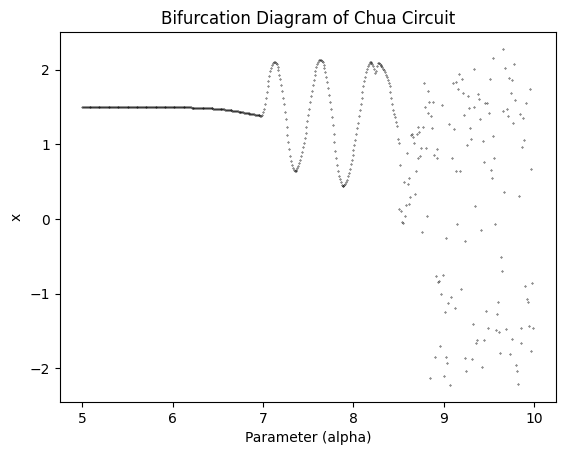

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Chua circuit parameters
alpha_min = 5
alpha_max = 10
num_iterations = 1000
num_transient = 100

def f(x, a, b):
    return b * x + (a - b) * (np.abs(x + 1) - np.abs(x - 1)) / 2

def chua_circuit(t, r, alpha, beta, a, b):
    x, y, z = r
    dx_dt = alpha * (y - x + f(x, a, b))
    dy_dt = x - y + z
    dz_dt = -beta * y
    return dx_dt, dy_dt, dz_dt

def RUNKUT4_step(f, t, r, step, *args):
    k1 = step * np.array(f(t, r, *args))
    k2 = step * np.array(f(t + 0.5 * step, r + 0.5 * k1, *args))
    k3 = step * np.array(f(t + 0.5 * step, r + 0.5 * k2, *args))
    k4 = step * np.array(f(t + step, r + k3, *args))
    return r + (k1 + 2.0 * k2 + 2.0 * k3 + k4) / 6.0

def compute_bifurcation_diagram(param_range, num_iterations, num_transient):
    bifurcation_diagram = []

    for alpha in param_range:
        x0 = 0.0
        y0 = 0.0
        z0 = 0.6
        r0 = [x0, y0, z0]
        r = r0

        # Perform transient iterations
        for _ in range(num_transient):
            r = RUNKUT4_step(chua_circuit, 0, r, 0.01, alpha, beta, a, b)

        # Collect the values after transient iterations
        for _ in range(num_iterations):
            r = RUNKUT4_step(chua_circuit, 0, r, 0.05, alpha, beta, a, b)
        bifurcation_diagram.append([alpha, r[0]])

    return np.array(bifurcation_diagram)

# Generate the range of parameter values
param_range = np.arange(alpha_min, alpha_max, 0.01)

# Set the remaining Chua circuit parameters
beta = 100/7
a = 8/7
b = 5/7

# Compute the bifurcation diagram
bifurcation_data = compute_bifurcation_diagram(param_range, num_iterations, num_transient)

# Plot the bifurcation diagram
plt.scatter(bifurcation_data[:, 0], bifurcation_data[:, 1], s=0.1, c='black')
plt.xlabel('Parameter (alpha)')
plt.ylabel('x')
plt.title('Bifurcation Diagram of Chua Circuit')
plt.show()

In [ ]:
import numpy as np
from scipy.integrate import odeint


# Numerically integrate the Chua circuit equations
t = np.linspace(0, 100, 1000)  # Time points for integration
initial_state = [0.1, 0.2, 0.3]  # Initial conditions
trajectory = odeint(chua_circuit, initial_state, t)

# Initialize tangent vectors
num_points = len(trajectory)
dim = len(initial_state)
tangent_vectors = np.random.randn(num_points, dim, dim)  # Random initial tangent vectors

# Oseledets algorithm
for i in range(num_points):
    # Orthogonalize tangent vectors using Gram-Schmidt process
    for j in range(i):
        tangent_vectors[i] -= np.dot(tangent_vectors[i], tangent_vectors[j].T) * tangent_vectors[j]
    tangent_vectors[i] /= np.linalg.norm(tangent_vectors[i], axis=1, keepdims=True)  # Normalize

    # Update tangent vectors using the Chua circuit equations
    state = trajectory[i]
    jacobian = ...  # Compute the Jacobian matrix for the Chua circuit equations
    tangent_vectors[i] = np.dot(jacobian, tangent_vectors[i].T).T

# Compute the singular value decomposition (SVD)
tangent_vectors = tangent_vectors.reshape(-1, dim)  # Flatten the tangent vectors
u, s, vh = np.linalg.svd(tangent_vectors, full_matrices=False)

# Calculate the Lyapunov exponents
lyapunov_exponents = np.log(np.abs(s)) / t[-1]

# Print the Lyapunov exponents
for i, exponent in enumerate(lyapunov_exponents):
    print(f"Lyapunov Exponent {i+1}: {exponent}")


In [ ]:
import numpy as np

def f(x, a, b):
    return b * x + (a - b) * (np.abs(x + 1) - np.abs(x - 1)) / 2

def chua_circuit(t, r, alpha, beta, a, b):
    x, y, z = r
    dx_dt = alpha * (y - x + f(x, a, b))
    dy_dt = x - y + z
    dz_dt = -beta * y
    return np.array([dx_dt, dy_dt, dz_dt])

def RUNKUT4_step(f, t, r, step, *args):
    k1 = step * np.array(f(t, r, *args))
    k2 = step * np.array(f(t + 0.5 * step, r + 0.5 * k1, *args))
    k3 = step * np.array(f(t + 0.5 * step, r + 0.5 * k2, *args))
    k4 = step * np.array(f(t + step, r + k3, *args))
    return r + (k1 + 2.0 * k2 + 2.0 * k3 + k4) / 6.0

# Define parameters
alpha = 9
beta = 100/7
a = 8/7
b = 5/7

# Define integration settings
t0 = 0.0  # Initial time
tf = 100.0  # Final time
dt = 0.1  # Time step

# Initialize the state vector
initial_state = np.array([0.0, 0.0, 0.6])

# Initialize the tangent vector
initial_tangent_vector = np.zeros_like(initial_state)
initial_tangent_vector[0] = 1.0  # Perturbation along x-axis

# Number of iterations
num_iterations = int((tf - t0) / dt)

# Oseledets algorithm
lyapunov_exponents = np.zeros_like(initial_state)

for _ in range(num_iterations):
    # Calculate the trajectory using Runge-Kutta method
    t = t0
    state = initial_state
    tangent_vector = initial_tangent_vector

    for _ in range(num_iterations):
        state = RUNKUT4_step(chua_circuit, t, state, dt, alpha, beta, a, b)
        tangentvector = RUNKUT4_step(chua_circuit, t, tangent_vector, dt, alpha, beta, a, b)
        tangent_vector = tangentvector-state
        # Normalize the tangent vector
        tangent_vector /= np.linalg.norm(tangent_vector)

        # Update Lyapunov exponents using Gram-Schmidt process
        for i in range(len(lyapunov_exponents)):
            lyapunov_exponents[i] += np.log(np.linalg.norm(tangent_vector[i])) / dt

    t0 += dt

# Average the Lyapunov exponents
lyapunov_exponents /= (tf - t0)

# Print the Lyapunov exponents
for i, exponent in enumerate(lyapunov_exponents):
    print(f"Lyapunov Exponent {i+1}: {exponent}")


Lyapunov Exponent 1: -1.1602436458040642e+16
Lyapunov Exponent 2: -1.161397582203093e+16
Lyapunov Exponent 3: -282063808559019.75


In [ ]:
import numpy as np
def jacobian(x):
    # where d(f(x))/dx = b + 0.5*(a - b)*(1 - sign(x - 1)) - 0.5*(a - b)*(1 - sign(x + 1))
    dfdx = b + 0.5*(a - b)*(1 - np.sign(x - 1)) - 0.5*(a - b)*(1 - np.sign(x + 1))
    J = np.array([[-alpha + alpha*dfdx, alpha, 0],
                  [1, -1, 1],
                  [0, -beta, 0]])
    return J

def f(x, a, b):
    return b * x + (a - b) * (np.abs(x + 1) - np.abs(x - 1)) / 2

def chua_circuit(t, r, alpha, beta, a, b):
    x, y, z = r
    dx_dt = alpha * (y - x + f(x, a, b))
    dy_dt = x - y + z
    dz_dt = -beta * y
    return np.array([dx_dt, dy_dt, dz_dt])

def RUNKUT4_step(f, t, r, step, *args):
    k1 = step * np.array(f(t, r, *args))
    k2 = step * np.array(f(t + 0.5 * step, r + 0.5 * k1, *args))
    k3 = step * np.array(f(t + 0.5 * step, r + 0.5 * k2, *args))
    k4 = step * np.array(f(t + step, r + k3, *args))
    return r + (k1 + 2.0 * k2 + 2.0 * k3 + k4) / 6.0

# Define parameters
alpha = 9
beta = 100/7
a = 8/7
b = 5/7

# Define integration settings
t0 = 0.0  # Initial time
tf = 100.0  # Final time
dt = 0.01  # Time step

# Initialize the state vector
initial_state = np.array([0.0, 0.0, 0.6])

# Initialize the tangent matrix
initial_tangent_matrix = np.eye(len(initial_state))

# Number of iterations
num_iterations = int((tf - t0) / dt)

# Oseledets algorithm
lyapunov_exponents = np.zeros(len(initial_state))

for _ in range(num_iterations):
    # Calculate the trajectory using Runge-Kutta method
    t = t0
    state = initial_state
    tangent_matrix = initial_tangent_matrix

    for _ in range(num_iterations):
        state = RUNKUT4_step(chua_circuit, t, state, dt, alpha, beta, a, b)
        jacob = jacobian(state[0])  # Compute the Jacobian matrix for the Chua circuit equations
        tangent_matrix = np.dot(jacob, tangent_matrix)

        # QR decomposition to orthogonalize the tangent matrix
        tangent_matrix, _ = np.linalg.qr(tangent_matrix)

        # Update Lyapunov exponents using Gram-Schmidt process
        for i in range(len(lyapunov_exponents)):
            lyapunov_exponents[i] += np.log(np.linalg.norm(tangent_matrix[i])) / dt

    t += dt

# Average the Lyapunov exponents
lyapunov_exponents /= (tf - t0)

# Print the Lyapunov exponents
for i, exponent in enumerate(lyapunov_exponents):
    print(f"Lyapunov Exponent {i+1}: {exponent}")

Lyapunov Exponent 1: -5.824229987183571e-09
Lyapunov Exponent 2: -3.6270986214503864e-09
Lyapunov Exponent 3: -3.4772185131259903e-09


<ipython-input-66-f18a74d604d1>:4: RuntimeWarning: overflow encountered in double_scalars
  return (1-x)*a


Text(0, 0.5, 'x')

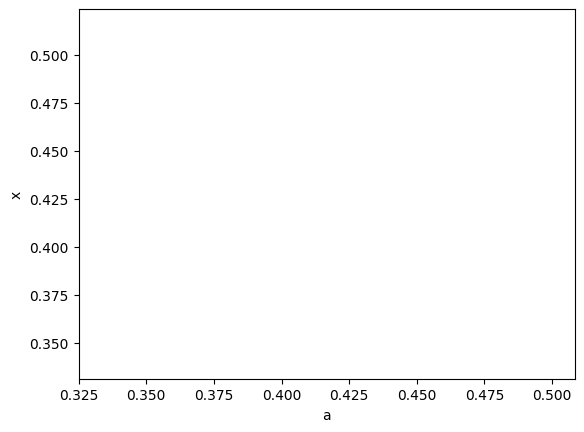

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
def tent_map(x,a):
    return (1-x)*a
A=np.linspace(0.5,2,100)
n_iterations = 1000
n_discard = 100
x0=0.5
Bifurcation_data =[]
for a in A:
    x=x0
    for I in range(n_discard):
         x=tent_map(x,a)
    for I in range(n_iterations):
         x= tent_map(x,a)
    Bifurcation_data.append([a, x])
Bifurcation_data =np.array([Bifurcation_data])
plt.plot(Bifurcation_data[:,0], Bifurcation_data[:,1])
plt.xlabel('a')
plt.ylabel('x')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def tent_map(x, r):
    if x < r:
        return x / r
    else:
        return (1 - x) / (1 - r)

def plot_bifurcation_diagram(r_values, x0, iterations):
    x = np.zeros(iterations)
    r = np.zeros(iterations)

    x[0] = x0

    for i in range(1, iterations):
        x[i] = tent_map(x[i-1], r_values)
        r[i] = r_values

    plt.scatter(r, x, s=0.1, c='black')
    plt.xlabel('r')
    plt.ylabel('x')
    plt.title('Bifurcation Diagram - Tent Map')
    plt.show()

# Set the parameter range and initial condition
r_values = np.linspace(0.5, 2, 1000)
x0 = 0.5

# Set the number of iterations
iterations = 10000

# Generate and plot the bifurcation diagram
plot_bifurcation_diagram(r_values, x0, iterations)

ValueError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def tent_map(x, a):
    if x < 0.5:
        return a * x
    else:
        return a * (1 - x)

def plot_bifurcation_diagram(a_values, x0, iterations):
    x = []
    Aro = []

    for a in a_values:
        for i in range(iterations):
            x = tent_map(x0, a)
        x.append(x)
        Aro.append(a)

    plt.scatter(Aro, x, s=0.1, c='black')
    plt.xlabel('a')
    plt.ylabel('x')
    plt.title('Bifurcation Diagram - Tent Map')
    plt.show()

# Set the parameter range and initial condition
a_values = np.linspace(0.5, 2, 1000)
x0 = 1/(2**(1/2))

# Set the number of iterations
iterations = 1000

# Generate and plot the bifurcation diagram
plot_bifurcation_diagram(a_values, x0, iterations)

AttributeError: ignored

In [ ]:
def tent_map(x, r):
    if x < 0.5:
        return a * x
    else:
        return a * (1 - x)
def generate_tent_map_sequence(x0, r, num_iterations):
    sequence = [1/(2**(1/2)) ]
    for _ in range(num_iterations):
        x = tent_map(sequence[-1], r)
        sequence.append(x)
    return sequence
import matplotlib.pyplot as plt

def plot_tent_map_histogram(sequence):
    plt.hist(sequence, bins=50, alpha=0.75)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title('Tent Map Histogram')
    plt.show()

# Parameters
A = 1.99 # Map parameter
num_iterations = 1000  # Number of iterations

# Generate sequence
sequence = generate_tent_map_sequence(x0, r, num_iterations)

# Plot histogram
plot_tent_map_histogram(sequence)

NameError: ignored

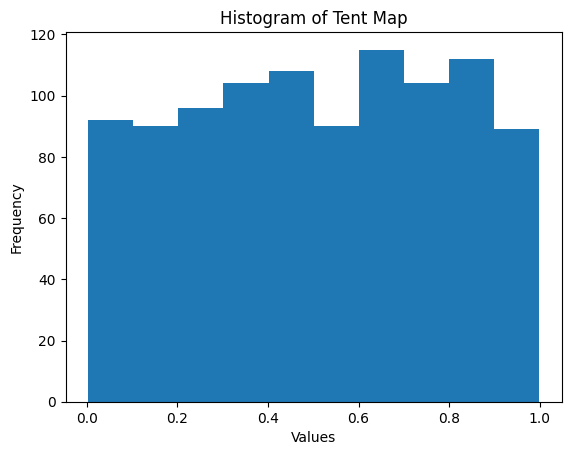

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the tent map function
def tent_map(x, A):
    return A * np.minimum(x, 1-x)

# Set the parameter A and the initial condition X0
A = 1.999
X0 = 1/np.sqrt(2)

# Initialize an array to store the iterates
X = np.zeros(1000)

# Set the initial condition
X[0] = X0

# Iterate the tent map for 1000 times
for n in range(999):
    X[n+1] = tent_map(X[n], A)

# Print the last 10 iterates


# Plot histogram
num_bins = 50
plt.hist(X)
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Tent Map')
plt.show()

[[5.00000000e-01 1.97215226e-31]
 [5.00000000e-01 9.86076132e-32]
 [5.00000000e-01 4.93038066e-32]
 ...
 [2.00000000e+00 0.00000000e+00]
 [2.00000000e+00 0.00000000e+00]
 [2.00000000e+00 0.00000000e+00]]


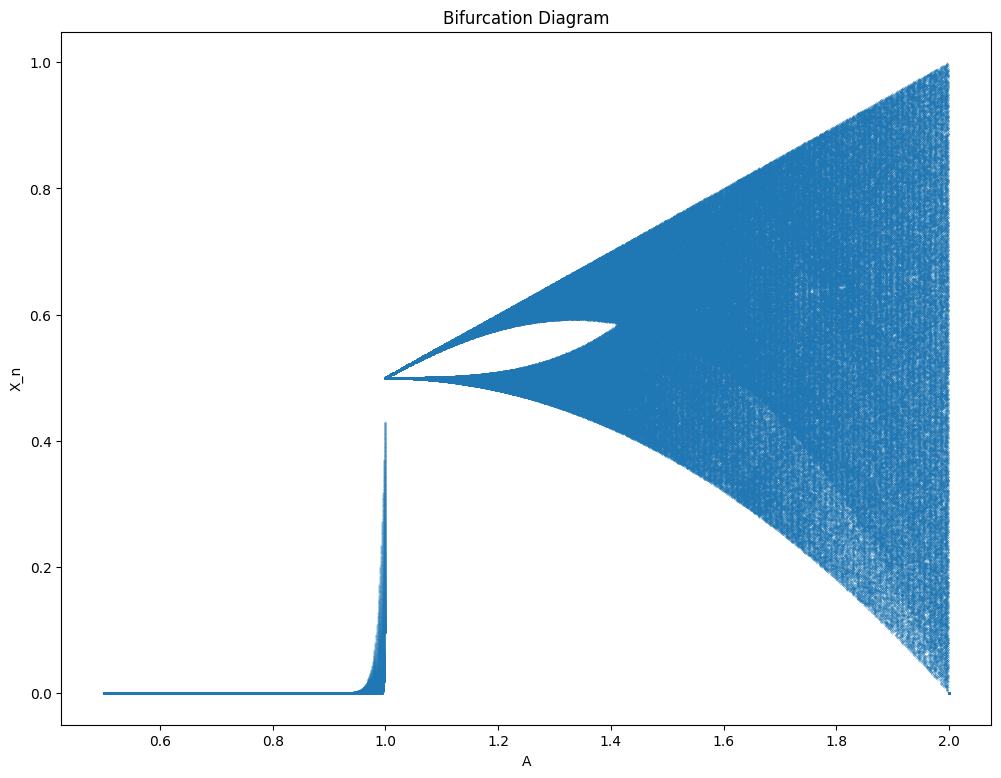

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def tent_map(x_n, A):
    return A* np.minimum (x_n, 1 - x_n)

def generate_bifurcation_diagram(A_values, x0, num_iterates, num_transient):
    bifurcation_diagram = []
    for A in A_values:
        x_n = x0
        for _ in range(num_transient):
            x_n = tent_map(x_n, A)

        for _ in range(num_iterates):
            x_n = tent_map(x_n, A)
            bifurcation_diagram.append([A, x_n])

    return np.array(bifurcation_diagram)

# Set the parameter range and other variables
A_start = 0.5
A_end = 2
num_points = 1000
x0 = 0.5
num_iterates = 1000
num_transient = 100

# Generate the bifurcation diagram
A_values = np.linspace(A_start, A_end, num_points)
bifurcation_data = generate_bifurcation_diagram(A_values, x0, num_iterates, num_transient)

# Plot the bifurcation diagram
plt.figure(figsize=(12,9))
plt.scatter(bifurcation_data[:, 0], bifurcation_data[:, 1], s=0.1, marker='.')
plt.xlabel('A')
plt.ylabel('X_n')
plt.title('Bifurcation Diagram')
plt.savefig('Bifurcations.png')
plt.show()